## 2024년 1월 2일에 PER가 낮은 기업을 매수하고  2024년 11월 20일에 매도했을 때

In [1]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 8.8 MB/s eta 0:00:00


In [80]:
import pandas as pd
from pykrx import stock

fundamental = stock.get_market_fundamental('20240102')
price_change = stock.get_market_price_change('20240102', '20241120')

In [81]:
# PER이 낮은 상위 30개의 기업을 추립니다.
fundamental = fundamental[fundamental['PER']  > 0]
fundamental['PER_rank'] = fundamental['PER'].rank()
buy_ticker_list = fundamental.sort_values('PER_rank').head(30).index

<ipython-input-81-725574d349c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fundamental['PER_rank'] = fundamental['PER'].rank()


In [46]:
buy_cor_return = price_change.loc[buy_ticker_list, :]['등락률'].mean()
total_cor_return = price_change['등락률'].mean()
print(f'PER이 낮은 매수 30개 기업의 등락률 평균: {buy_cor_return}')
print(f'전체 기업의 등락률 평균: {total_cor_return}')

PER이 낮은 매수 30개 기업의 등락률 평균: -4.1383333333333345
전체 기업의 등락률 평균: -6.884501573976915


In [50]:
len(price_change) / 31

30.225806451612904

In [48]:
price_change = price_change[price_change['거래량'] != 0]

In [66]:
shuffle_price_change = price_change.sample(frac = 1)
shuffle_price_change['group'] = pd.cut(shuffle_price_change.reset_index().index, bins = 31, labels = False) # 31개의 그룹으로 생성한다.
shuffle_price_change.head()

,종목명,시가,종가,변동폭,등락률,거래량,거래대금,group
티커,,,,,,,,
001500,현대차증권,8590,8690,100,1.16,7779418,69497506350,0
014280,금강공업,5680,4410,-1270,-22.36,19212695,101129729685,0
079550,LIG넥스원,130500,237500,107000,81.99,69455872,12595448228300,0
028100,동아지질,12940,13810,870,6.72,23430559,330100798230,0
007160,사조산업,42000,37550,-4450,-10.60,13009513,696911477050,0


In [70]:
shuffle_price_change[['group', '등락률']].groupby('group').mean().sort_values('등락률').reset_index(drop = True)

,등락률
0,-17.774000
1,-13.455667
2,-13.428000
3,-11.005000
4,-10.167419
5,-10.116667
6,-8.684000
7,-8.590000
8,-8.149333
9,-7.799667


### 실습
- 코스닥 종목 중에 PER이 2.5~10인 종목 중 PBR이 낮은 30개의 종목을 매수했을 때 전체와 수익률 비교
- 매수 시점 : 2024년 1월 2일
- 매도 시점 : 2024년 11월 20일

In [85]:
fundamental_KOSDAQ = stock.get_market_fundamental('20240102', market = 'KOSDAQ')
price_change_KOSDAQ = stock.get_market_price_change('20240102', '20241120', market = 'KOSDAQ')

In [88]:
fundamental_KOSDAQ = fundamental_KOSDAQ[(fundamental_KOSDAQ['PER']  > 2.5) & (fundamental_KOSDAQ['PER'] < 10)]
fundamental_KOSDAQ['PBR_rank'] = fundamental_KOSDAQ['PBR'].rank()
buy_ticker_list = fundamental_KOSDAQ.sort_values('PBR_rank').head(30).index
buy_ticker_list

Index(['007680', '024830', '030530', '012620', '023410', '101330', '003380',
       '078020', '034810', '005710', '013120', '038540', '017650', '081580',
       '083640', '023600', '052330', '003100', '043370', '115570', '037400',
       '007330', '053620', '012700', '004590', '094840', '023760', '035890',
       '050860', '017480'],
      dtype='object', name='티커')

In [90]:
buy_cor_return = price_change_KOSDAQ.loc[buy_ticker_list, :]['등락률'].mean()
total_cor_return = price_change_KOSDAQ['등락률'].mean()
print(f'PBR이 낮은 매수 30개 기업의 등락률 평균: {buy_cor_return}')
print(f'전체 기업의 등락률 평균: {total_cor_return}')

PBR이 낮은 매수 30개 기업의 등락률 평균: -9.916
전체 기업의 등락률 평균: -20.94552230046948


KODAQ(소형)이 KOSPI(대형)에 비해서 상대적으로 더 효과가 더 좋다.

## 시가 총액을 활용해서 3개의 그룹으로 나눈 뒤에 효과 비교

In [97]:
# stock.get_nearest_business_day_in_a_week : 날짜 주변의 business day
start_date = stock.get_nearest_business_day_in_a_week('20100101', prev = False) # 없으면 이후
end_date = stock.get_nearest_business_day_in_a_week('20101231', prev = True) # 없으면 이전

market_cap = stock.get_market_cap(start_date, market="ALL")[['종가', '시가총액']].rename(columns = {'종가' : 'Buy'}) # 종가에 매수
market_cap.head()

,Buy,시가총액
티커,,
005930,809000,119165163633000
005490,612000,53358343020000
005380,119000,26212901001000
105560,59400,22949290564200
015760,34250,21973694136000


In [96]:
end_price = stock.get_market_ohlcv(end_date, market="ALL")[['종가']].rename(columns = {"종가" : 'Sell'}) # 종가에 매도
end_price.head()

,Sell
티커,
069110,799
060310,3270
900010,1840
038120,718
013340,1740


In [101]:
fundamental = stock.get_market_fundamental(start_date, market = 'ALL')
fundamental = fundamental[['PER', 'PBR']]
fundamental = fundamental[fundamental['PER'] > 0]
fundamental.head()

,PER,PBR
티커,,
054620,9.45,1.16
001460,16.15,0.43
001040,5.46,0.78
079160,21.71,6.18
035760,28.50,1.57


In [114]:
concat_data = pd.concat([market_cap, end_price, fundamental], axis = 1, join = 'inner')
concat_data = concat_data.sort_values(by = '시가총액')
concat_data.loc[:, 'group'] = pd.cut(range(len(concat_data)), bins = 3, labels = ['small', 'mid', 'big'])
concat_data.head()

,Buy,시가총액,Sell,PER,PBR,group
티커,,,,,,
003965,89900,339822000,111000,52.82,0.04,small
017680,7240,6081600000,9900,2.55,0.27,small
032680,650,6837424100,600,0.40,0.33,small
058220,1470,8526000000,1570,4.76,0.45,small
007530,1360,8558436480,1795,151.11,0.78,small


In [115]:
concat_data['등락률'] = concat_data['Sell'] / concat_data['Buy'] - 1
concat_data.head()

,Buy,시가총액,Sell,PER,PBR,group,등락률
티커,,,,,,,
003965,89900,339822000,111000,52.82,0.04,small,0.234705
017680,7240,6081600000,9900,2.55,0.27,small,0.367403
032680,650,6837424100,600,0.40,0.33,small,-0.076923
058220,1470,8526000000,1570,4.76,0.45,small,0.068027
007530,1360,8558436480,1795,151.11,0.78,small,0.319853


In [119]:
#  group별 PER이 2.5~10인 종목 중 PBR이 낮은 30개의 종목
cond = (concat_data['PER'] > 2.5) & (concat_data['PER'] < 10)
group_30 = concat_data[cond].sort_values('PBR').groupby('group').head(30)
group_30.head()

<ipython-input-119-416c9ff5268c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_30 = concat_data[cond].sort_values('PBR').groupby('group').head(30)


,Buy,시가총액,Sell,PER,PBR,group,등락률
티커,,,,,,,
015110,5140,33871299580,2690,3.04,0.16,small,-0.476654
014350,4600,27600000000,4000,4.68,0.17,small,-0.130435
013700,6950,31380834600,5800,8.40,0.17,small,-0.165468
004270,8800,31866700800,8200,6.90,0.18,small,-0.068182
008600,2810,35207130680,2950,6.40,0.20,small,0.049822


In [121]:
group_30[['group', '등락률']].groupby('group').mean()

<ipython-input-121-b55582505200>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_30[['group', '등락률']].groupby('group').mean()


,등락률
group,
small,0.203777
mid,0.072038
big,0.030025


### 여러해 기준으로 다시 확인

In [129]:
df = pd.DataFrame()
for year in range(2010, 2024):
  start_date = stock.get_nearest_business_day_in_a_week(f'{year}0101', prev = False) # 없으면 이후
  end_date = stock.get_nearest_business_day_in_a_week(f'{year}1231', prev = True) # 없으면 이전

  market_cap = stock.get_market_cap(start_date, market="ALL")[['종가', '시가총액']].rename(columns = {'종가' : 'Buy'}) # 종가에 매수
  end_price = stock.get_market_ohlcv(end_date, market="ALL")[['종가']].rename(columns = {"종가" : 'Sell'}) # 종가에 매도
  fundamental = stock.get_market_fundamental(start_date, market = 'ALL')
  fundamental = fundamental[['PER', 'PBR']]
  fundamental = fundamental[fundamental['PER'] > 0]
  concat_data = pd.concat([market_cap, end_price, fundamental], axis = 1, join = 'inner')
  concat_data = concat_data.sort_values(by = '시가총액')
  concat_data.loc[:, 'group'] = pd.cut(range(len(concat_data)), bins = 3, labels = ['small', 'mid', 'big'])
  concat_data['등락률'] = concat_data['Sell'] / concat_data['Buy'] - 1
  cond = (concat_data['PER'] > 2.5) & (concat_data['PER'] < 10)
  group_30 = concat_data[cond].sort_values('PBR').groupby('group').head(30)
  group_ror = group_30[['group', '등락률']].groupby('group').mean().rename(columns = {'등락률' : f'{year}'})
  df = pd.concat([df, group_ror], axis = 1)

<ipython-input-129-bb9faf133c86>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_30 = concat_data[cond].sort_values('PBR').groupby('group').head(30)
<ipython-input-129-bb9faf133c86>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_ror = group_30[['group', '등락률']].groupby('group').mean().rename(columns = {'등락률' : f'{year}'})
<ipython-input-129-bb9faf133c86>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

<Axes: >

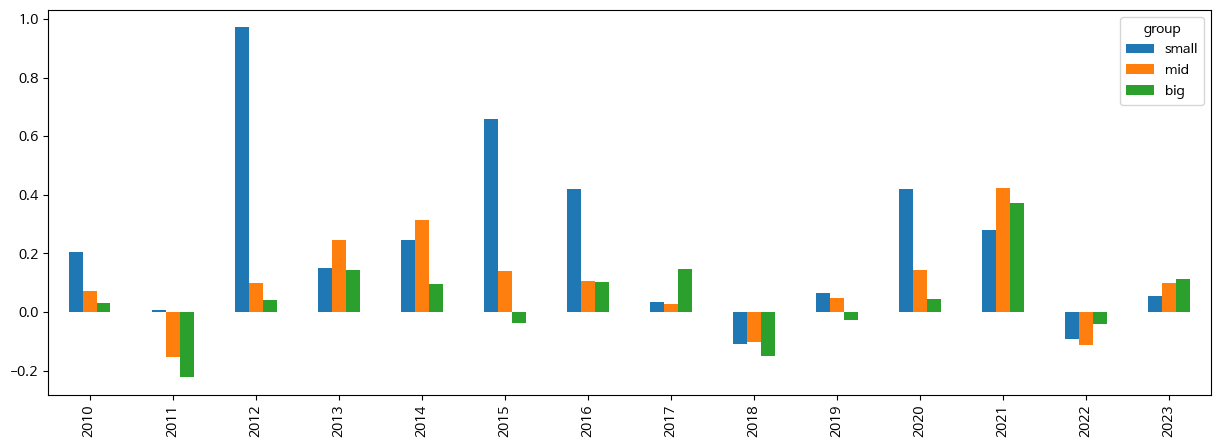

In [132]:
df.T.plot.bar(figsize = (15, 5))

In [135]:
cum_ror = (df + 1).cumprod(axis = 1) - 1

<Axes: >

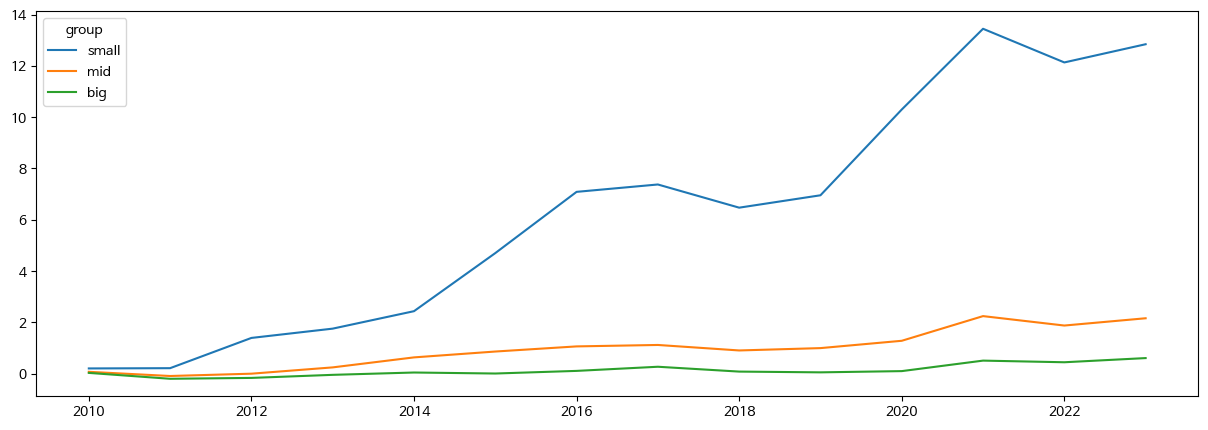

In [136]:
cum_ror.T.plot.line(figsize = (15, 5))